In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

## Create Fake Data

In [2]:
samples = 1000
data_seed = 42
np.random.seed(42)
classMeans = np.vstack([np.array([-1,1]),np.array([1,-1])])
classStd=[0.75, .5]
target = np.array([np.random.randint(0,2) for _ in range(samples)])
inputFeatures = np.array([
    classMeans[label,:] + np.random.randn(2)*classStd[label]
    for label in target]
)
df = pd.DataFrame({'x0':inputFeatures[:,0],
                   'x1':inputFeatures[:,1],
                   'target':np.array(['Positive','Negative'])[target]
    
})
df.head()

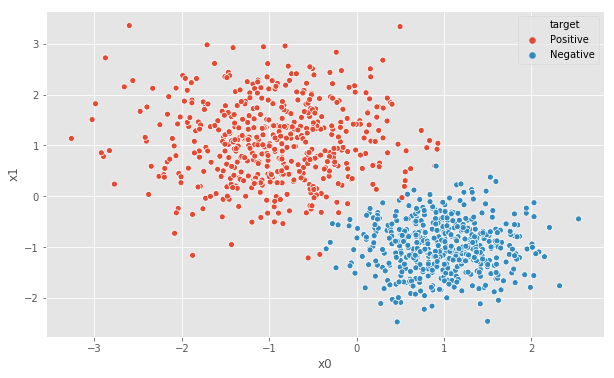

In [3]:
fig, ax = plt.subplots(1,figsize=(10,6))
_ = sns.scatterplot(x='x0',y='x1',hue='target', data =df, ax=ax)

In [4]:
def sigmoid(z):
    """Logistic Sigmoid"""
    return (np.exp(z*(-1.0))+1)**(-1)

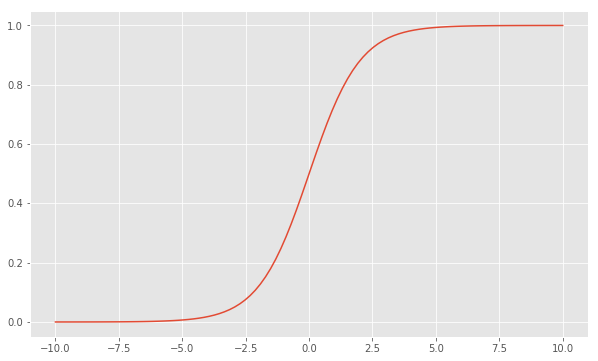

In [5]:
_, ax = plt.subplots(1,figsize=(10,6))
xaxis = np.linspace(-10,10,100)
_ = ax.plot(xaxis,sigmoid(xaxis))

In [6]:
seed = 56
np.random.seed(seed)

weights_0 = np.random.randn(2)
bias_0 = np.random.randn(1)
print(weights_0, bias_0)

[-1.03764318  0.59365816] [1.10268062]


In [7]:
def predict(X, weights, bias):
    return sigmoid(np.dot(X,weights)+bias)

In [8]:
X = df[['x0','x1']]
df['p_prob'] = predict(X,weights_0,bias_0)
df['p_label']=df['p_prob']>0.5

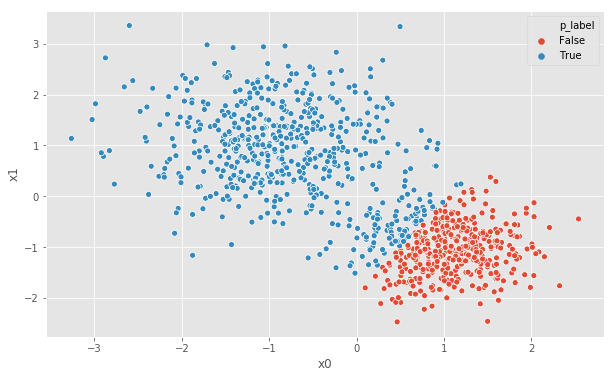

In [9]:
_, ax = plt.subplots(1,figsize=(10,6))
_ = sns.scatterplot(x='x0',y='x1',hue='p_label',ax=ax,data=df)

In [10]:
lab_table = np.array([['TN','FP'],['FN','TP']])
df['confused']=np.array([lab_table[int(target=='Positive'),int(p_label)]
 for target, p_label in df[['target','p_label']].values   
])
df.head()

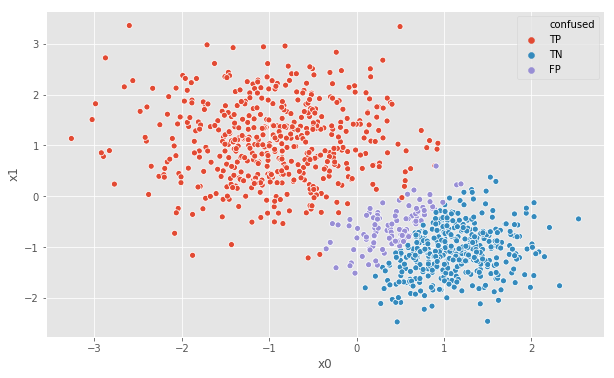

In [11]:
_, ax = plt.subplots(1,figsize=(10,6))
_ = sns.scatterplot(x='x0',y='x1',hue='confused',ax=ax,data=df)

In [12]:
# loss fucntion

def cross_entropy_loss(y,y_pred):
    loss=np.zeros(y.shape[0])
    loss[y==1]=-np.log(y_pred[y==1])
    loss[y!=1]=-np.log(1-y_pred[y!=1])
    return loss.mean()

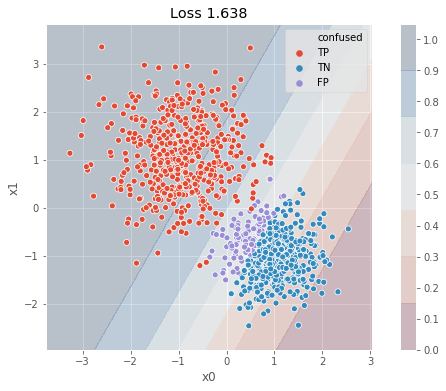

In [13]:
import matplotlib.colors as colors

y = (df['target']=='Postive').values

def show_classification(X,y,weights,bias):
    cm = plt.cm.RdBu
    bounds = np.arange(0,11)*.1
    norm = colors.BoundaryNorm(boundaries=bounds,ncolors=256)
    x_min, x_max = X.values[:,0].min() - .5, X.values[:,0].max() + .5
    y_min, y_max = X.values[:,1].min() - .5, X.values[:,1].max() + .5
    h = .2
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z = predict(np.c_[xx.ravel(),yy.ravel()], weights, bias)
    Z = Z.reshape(xx.shape)
    df['p_prob'] = predict(X,weights,bias)
    df['p_label']=df['p_prob'] > 0.5
    df['confused']=np.array([lab_table[int(target=='Positive'),int(p_label)]
     for target, p_label in df[['target','p_label']].values   
    ])
    loss = cross_entropy_loss(y,df['p_prob'])
    fig, ax = plt.subplots(1,figsize=(10,6))
    pcm = ax.contourf(xx,yy,Z,norm=norm,cmap=cm,alpha=0.2)
    _ = sns.scatterplot(x='x0',y='x1',hue='confused',ax=ax,data=df)
    ax.set_title("Loss {:03.3f}".format(loss))
    fig.colorbar(pcm, ax=ax,ticks=bounds)
    ax.legend()
    ax.set_aspect('equal')
    plt.show()
    
    return fig,ax

_ = show_classification(X,df['target'],weights_0,bias_0)

In [14]:
def gradient(X,y, weights, bias):
    num_obs, num_feats=X.shape
    y_pred = predict(X, weights,bias)
    errors = (y_pred-y).reshape(num_obs,1)
    return np.hstack([(X*errors).mean(axis=0),np.array(errors.mean())])

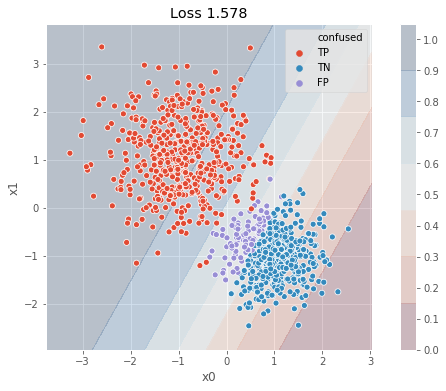

In [15]:
grad = gradient(X.values,y, weights_0, bias_0)
learning_rate=0.1
weights_1, bias_1 = (weights_0-learning_rate*grad[:2], 
                     bias_0-learning_rate*grad[2])
_=show_classification(X,y,weights_1,bias_1)

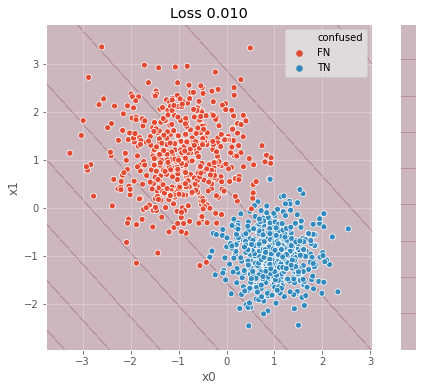

In [16]:
weights_n, bias_n = weights_1, bias_1
for _ in range(1000):
    grad = gradient(X.values,y, weights_n, bias_n)
    weights_n, bias_n = (weights_n-learning_rate*grad[:2], 
                         bias_n-learning_rate*grad[2])
    
_=show_classification(X,y,weights_n,bias_n)